In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib
from dgm_library_ergodic import env_initializing, sample_room, init_DGM, train, warmstart_sol,compute_loss

from DGM import * # NOQA
import numpy as np
import keras
import pandas as pd
from tensorflow.python.ops.numpy_ops import np_config

env_initializing()

DTYPE = 'float32'

verbose = 1

In [2]:
Phi_theta = init_DGM(RNN_layers = 0, FNN_layers=2, nodes_per_layer=200,activation="relu")
Gamma_theta = init_DGM(RNN_layers = 0, FNN_layers=2, nodes_per_layer=200,activation="relu")

phi = np.genfromtxt('phi.txt')
gamma = np.genfromtxt('gamma.txt')

Phi_theta,Gamma_theta, X0  = warmstart_sol(Phi_theta,Gamma_theta,phi,gamma,2)

------ preprocessing for Gamma_theta ------
Gamma_theta It 00000: loss = 2.53412964e+02
Gamma_theta It 00100: loss = 3.25015297e+01
Gamma_theta It 00200: loss = 1.00119381e+01
Gamma_theta It 00300: loss = 6.28245735e+00
Gamma_theta It 00400: loss = 5.23325777e+00
Gamma_theta It 00500: loss = 4.54096889e+00
Gamma_theta It 00600: loss = 4.06653166e+00
Gamma_theta It 00700: loss = 3.70244694e+00
Gamma_theta It 00800: loss = 3.39745259e+00
Gamma_theta It 00900: loss = 3.15003467e+00
Gamma_theta It 01000: loss = 2.94294500e+00
Gamma_theta It 01100: loss = 2.77214575e+00
Gamma_theta It 01200: loss = 2.63780975e+00
Gamma_theta It 01300: loss = 2.52922058e+00
Gamma_theta It 01400: loss = 2.44177628e+00
Gamma_theta It 01500: loss = 2.36599207e+00
Gamma_theta It 01600: loss = 2.30115724e+00
Gamma_theta It 01700: loss = 2.24268436e+00
Gamma_theta It 01800: loss = 2.19327188e+00
Gamma_theta It 01900: loss = 2.14874935e+00
Gamma_theta It 02000: loss = 2.10601807e+00
------ preprocessing  for Phi_th

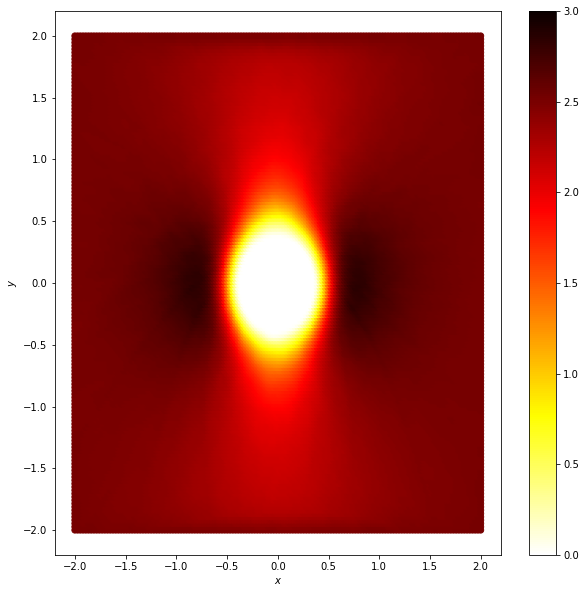

In [3]:
x = X0.iloc[:,0]
y = X0.iloc[:,1]
m = Gamma_theta(X0)*Phi_theta(X0)

fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=m, cmap='hot_r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.clim([0,3])
plt.colorbar()
plt.show()

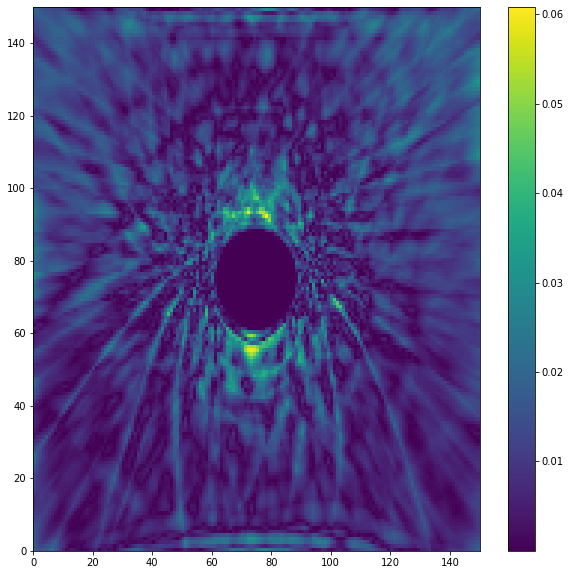

In [4]:
m_theta = m.numpy().reshape(150,150)
m_sol = phi*gamma
fig = plt.figure(figsize=(10,10))
plt.pcolor(abs(m_sol-m_theta))
plt.colorbar()
plt.show()

In [5]:
X_b, X_s, X_c = sample_room(0)

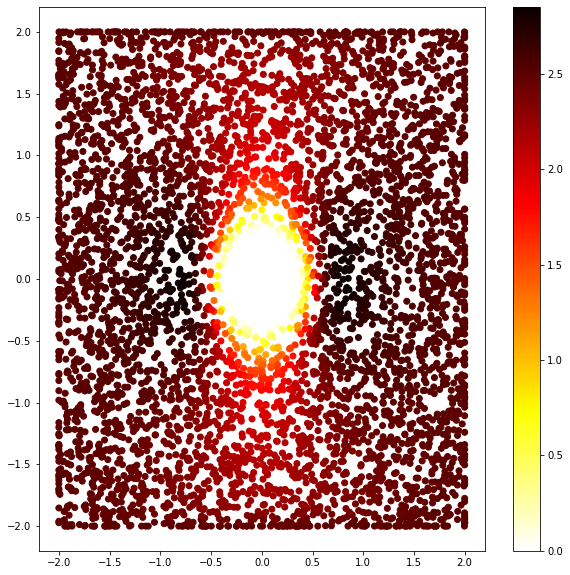

In [6]:
X0 = pd.concat([X_b,X_s,X_c])
x = X0.iloc[:,0]
y = X0.iloc[:,1]
m = Gamma_theta(X0)*Phi_theta(X0)
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=m, cmap='hot_r')
plt.colorbar()
plt.show()

In [7]:
from dgm_library_ergodic import get_derivatives

grad, h = get_derivatives(Phi_theta,tf.Variable(X0,dtype = DTYPE))

In [8]:
norm = np.sqrt(grad[:,0,0]**2 + grad[:,0,1]**2)

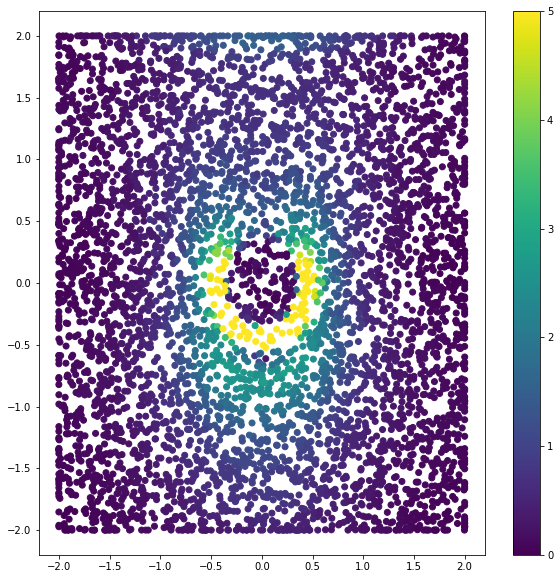

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=norm)
plt.colorbar()
plt.clim(0,5)
plt.show()

In [10]:
dx = 4/149
lap_phi = 0.28**4*(phi[:-2,1:-1] + phi[2:,1:-1] + phi[1:-1,:-2] + phi[1:-1,2:] - 4*phi[1:-1,1:-1])/(dx**2) 

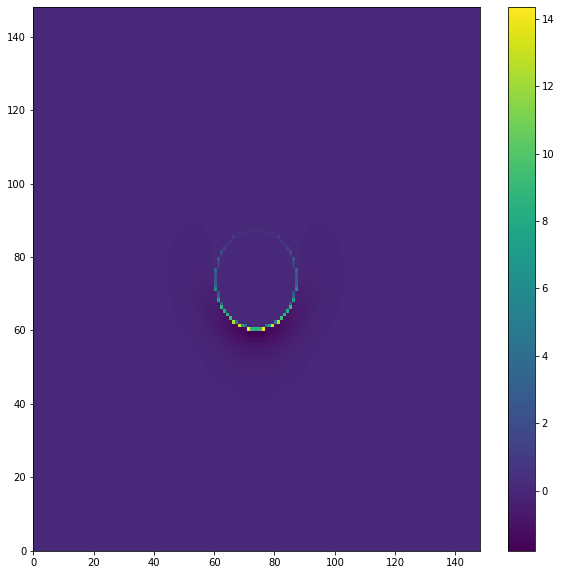

In [11]:
plt.figure(figsize=(10,10))
plt.pcolor(lap_phi)
plt.colorbar()
plt.show()

In [12]:
compute_loss(Phi_theta,Gamma_theta,tf.Variable(X0,dtype = DTYPE))

(<tf.Tensor: shape=(), dtype=float32, numpy=16896.873>,
 <tf.Tensor: shape=(), dtype=float32, numpy=18404.566>)